
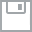
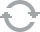
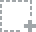
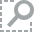
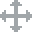
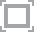
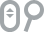
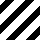
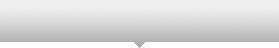
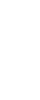
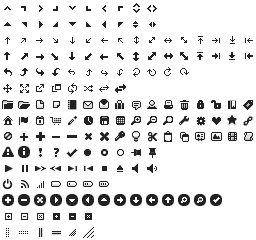
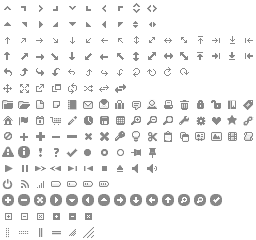
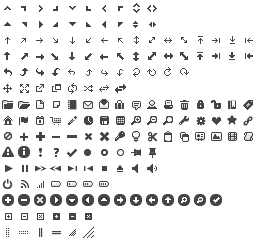
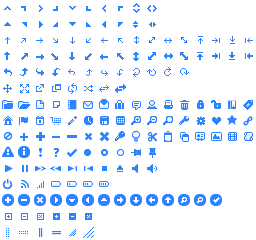
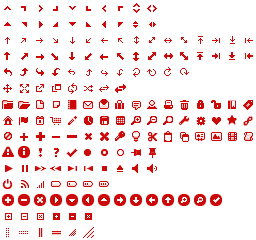
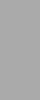
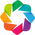
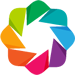

In [1]:
# Our numerical workhorses
import numpy as np
import pandas as pd
import scipy.integrate

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Seaborn, useful for graphics
import seaborn as sns

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'svg',}

# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 10, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

In [5]:
# load the data
df = pd.read_csv('data/morphLack.TAB',delimiter='\t')
#take a look at the data
df

,Source,IslandID,TaxonOrig,GenusL69,SpeciesL69,SubspL69,SpeciesID,SubspID,Sex,Plumage,BodyL,WingL,TailL,BeakW,BeakH,LBeakL,UBeakL,N-UBkL,TarsusL,MToeL
0,Lack CAS,Wlf_Wnm,Geospiza magnirostris,Geospiza,magnirostris,NaN,Geo.mag,Geo.mag,M,Black,NaN,86,NaN,NaN,20.7,NaN,22.8,15.7,NaN,NaN
1,Lack CAS,Wlf_Wnm,Geospiza magnirostris,Geospiza,magnirostris,NaN,Geo.mag,Geo.mag,M,Black,NaN,86,NaN,NaN,19.5,NaN,24.3,16.6,NaN,NaN
2,Lack CAS,Wlf_Wnm,Geospiza magnirostris,Geospiza,magnirostris,NaN,Geo.mag,Geo.mag,M,Black,NaN,88,NaN,NaN,NaN,NaN,23.1,15.1,NaN,NaN
3,Lack CAS,Wlf_Wnm,Geospiza magnirostris,Geospiza,magnirostris,NaN,Geo.mag,Geo.mag,M,Black,NaN,84,NaN,NaN,20.6,NaN,22.4,15.3,NaN,NaN
4,Lack CAS,Wlf_Wnm,Geospiza magnirostris,Geospiza,magnirostris,NaN,Geo.mag,Geo.mag,M,Black,NaN,86,NaN,NaN,21.4,NaN,23.1,15.4,NaN,NaN
5,Lack CAS,Wlf_Wnm,Geospiza magnirostris,Geospiza,magnirostris,NaN,Geo.mag,Geo.mag,M,Black,NaN,86,NaN,NaN,19.8,NaN,22.4,15.5,NaN,NaN
6,Lack CAS,Wlf_Wnm,Geospiza magnirostris,Geospiza,magnirostris,NaN,Geo.mag,Geo.mag,M,Black,NaN,87,NaN,NaN,20.2,NaN,22.0,14.8,NaN,NaN
7,Lack CAS,Wlf_Wnm,Geospiza magnirostris,Geospiza,magnirostris,NaN,Geo.mag,Geo.mag,M,Black,NaN,87,NaN,NaN,21.3,NaN,23.9,16.3,NaN,NaN
8,Lack CAS,Wlf_Wnm,Geospiza magnirostris,Geospiza,magnirostris,NaN,Geo.mag,Geo.mag,M,Black,NaN,86,NaN,NaN,21.5,NaN,24.2,16.6,NaN,NaN
9,Lack CAS,Wlf_Wnm,Geospiza magnirostris,Geospiza,magnirostris,NaN,Geo.mag,Geo.mag,M,P. black,NaN,80,NaN,NaN,19.0,NaN,22.1,15.2,NaN,NaN


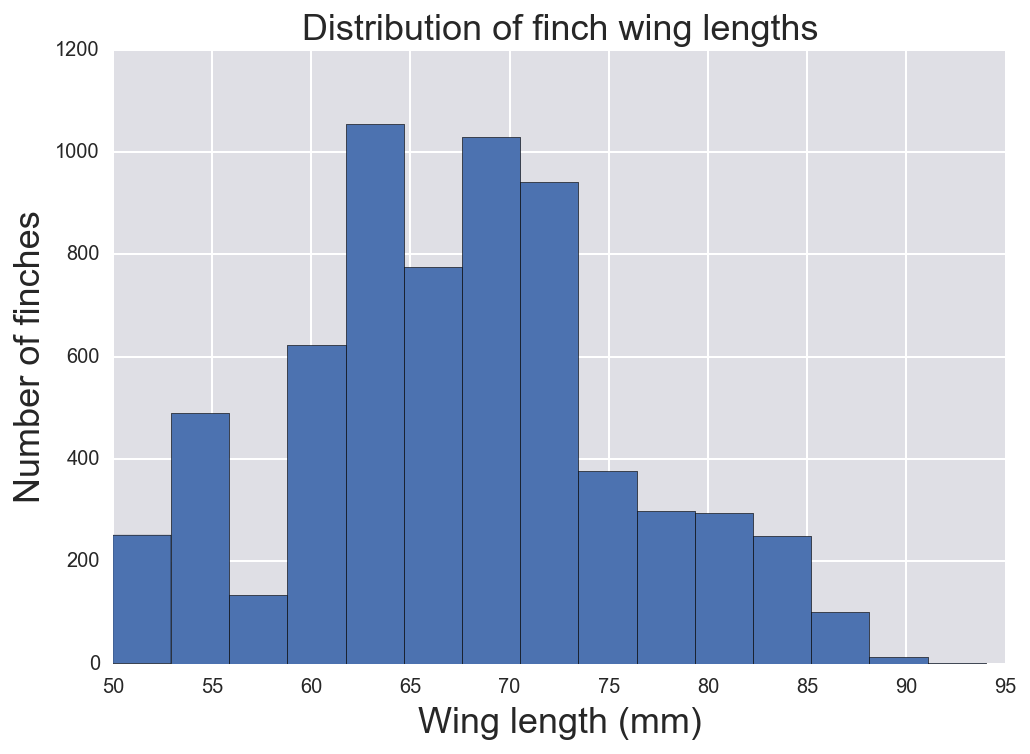

In [73]:
#Wing length looks like it has the most complete data, so we'll look at that first.

wings = df['WingL']
wings_tidy= wings.dropna()
wings_tidy
# plot the wing length distribution, treating all birds the same
_ = plt.hist(wings_tidy, bins =15)
plt.xlabel('Wing length (mm)')
plt.ylabel('Number of finches')
plt.title('Distribution of finch wing lengths')

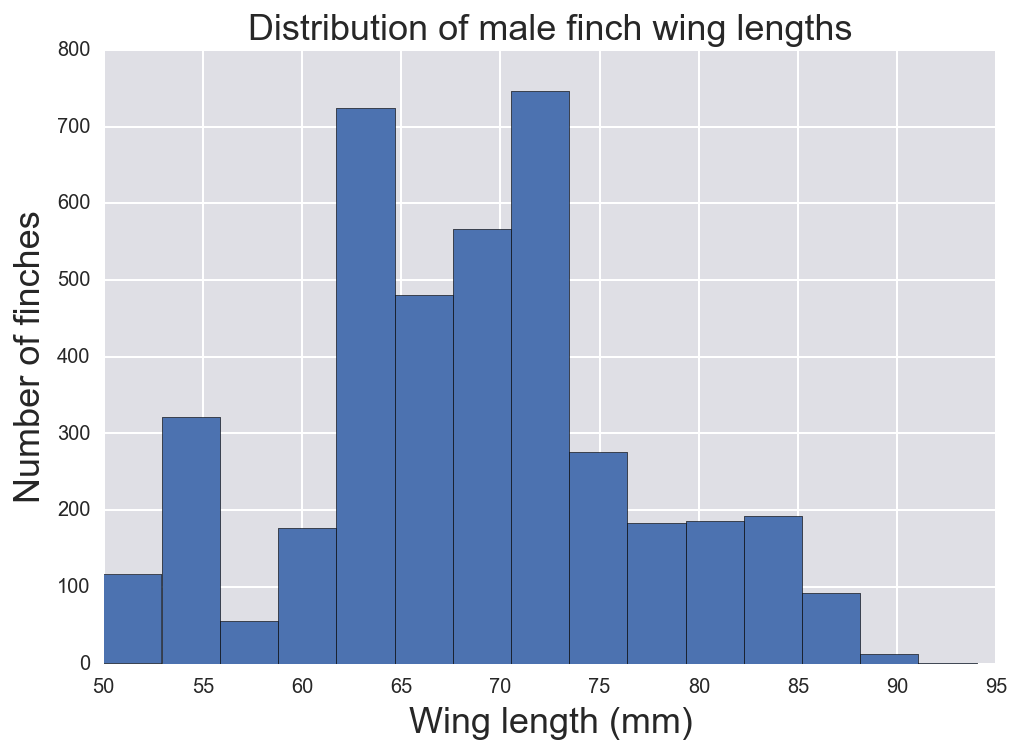

In [83]:
# Isolate wing data from male birds
male = (df['Sex'] == 'M')
male_wings = df[male]['WingL'].dropna()
male_wings

#plot it
_ = plt.hist(male_wings, bins=15)

plt.xlabel('Wing length (mm)')
plt.ylabel('Number of finches')
plt.title('Distribution of male finch wing lengths')

KeyError: 0

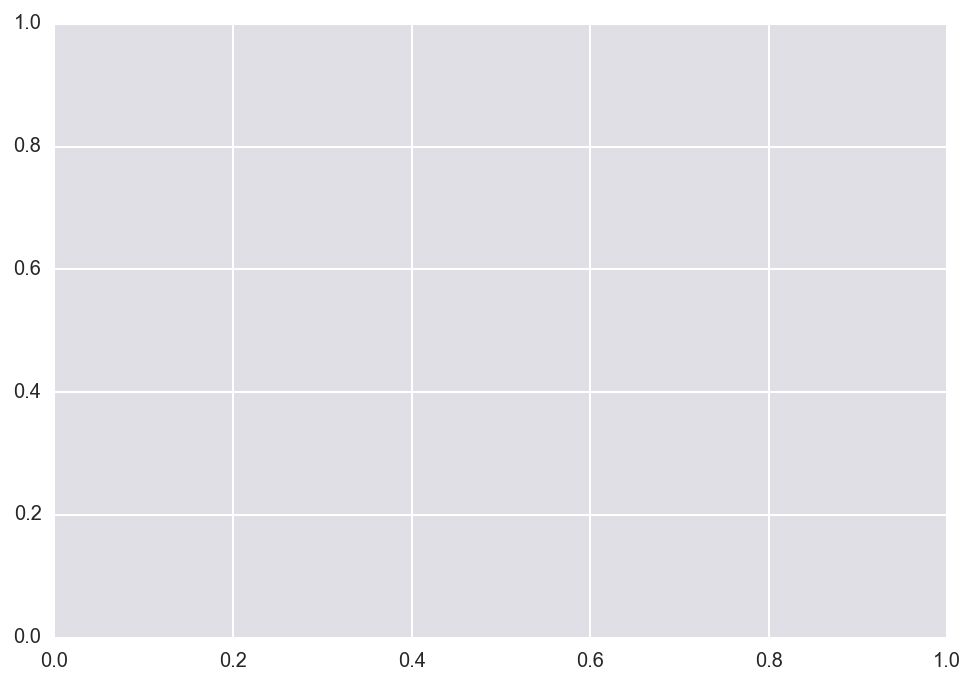

In [199]:
# Isolate wing data from female birds
female = (df['Sex'] == 'F')
female_wings = df[female]['WingL'].dropna()
female_wings

#plot it
_ = plt.hist(female_wings, bins=15)

plt.xlabel('Wing length (mm)')
plt.ylabel('Number of finches')
plt.title('Distribution of female finch wing lengths')


# These are the exact same commands that worked for the males
# As far as I can tell, it doesn't work because the females don't start with 0

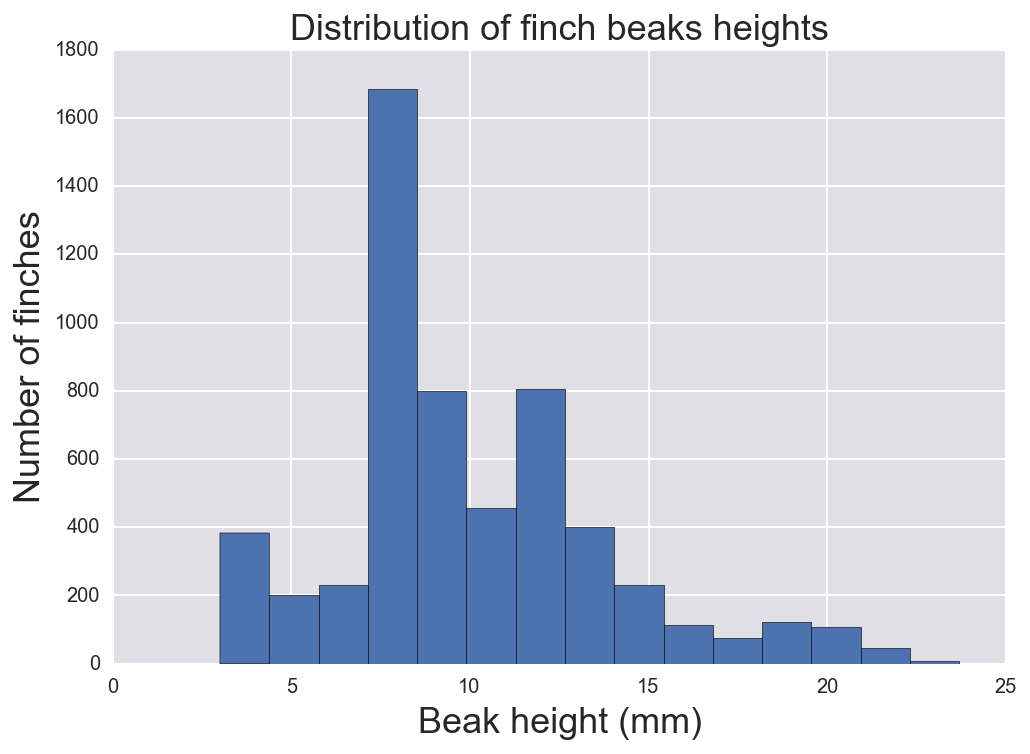

In [205]:
#Wing length looks like it has the most complete data, so we'll look at that first.

beaks = df['BeakH']
beaks_tidy= beaks.dropna()
beaks_tidy
# plot the wing length distribution, treating all birds the same
_ = plt.hist(beaks_tidy, bins =15)
plt.xlabel('Beak height (mm)')
plt.ylabel('Number of finches')
plt.title('Distribution of finch beaks heights')

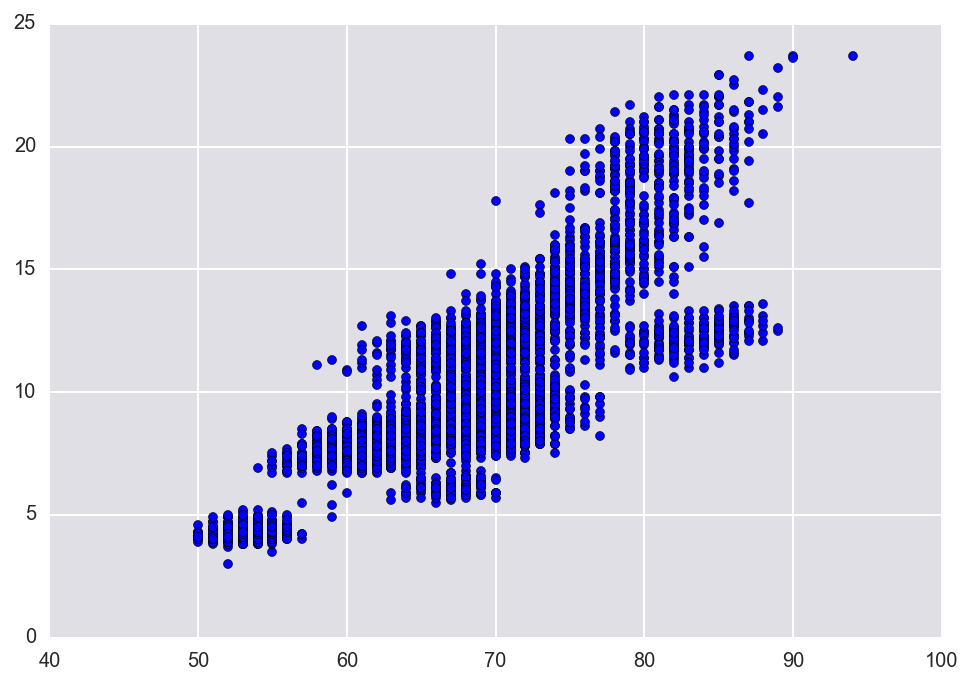

In [218]:
#Does beak height correllate with wing length?
df_beakwing = pd.DataFrame({'WingL': df['WingL'], 'BeakH': df['BeakH']})
df_beakwing = df_beakwing.dropna()
df_beakwing
plt.scatter(df_beakwing['WingL'],df_beakwing['BeakH'])
plt.xlabel('Wing Length (mm)')
plt.ylabel('Beak Height (mm)')
plt.title('Beak Height vs Wing Length')

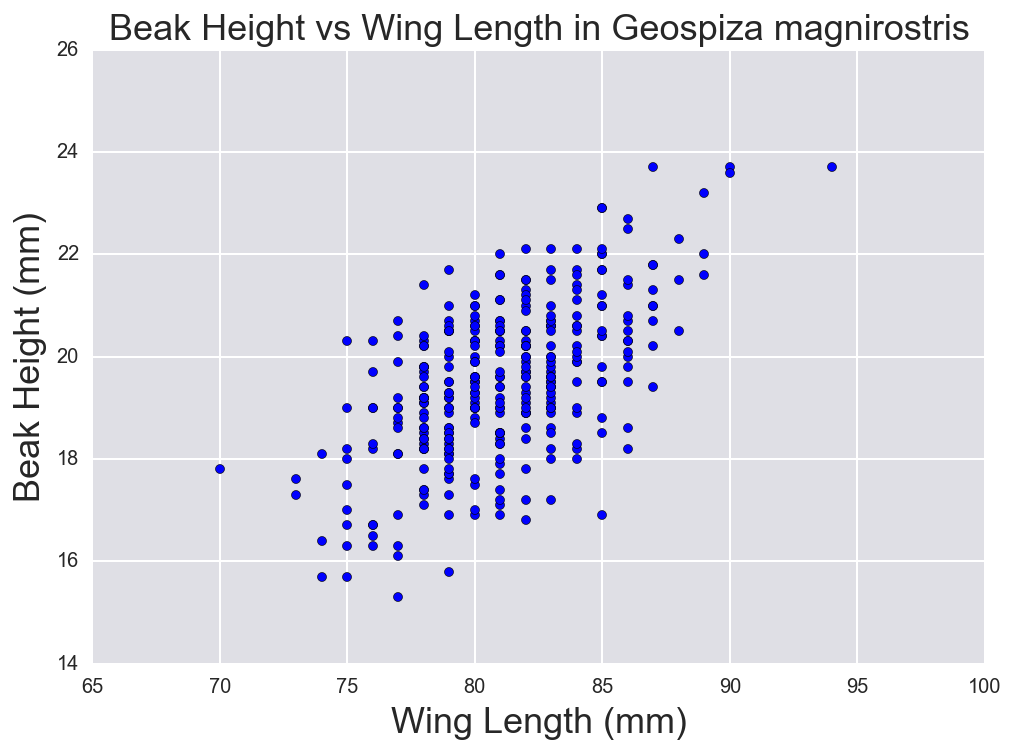

In [230]:
# Let's see if the correllation is better for a single species
Gma = (df['TaxonOrig'] == 'Geospiza magnirostris')
Gma

Gma_wings_beaks = pd.DataFrame({'WingL': df[Gma]['WingL'], 'BeakH': df[Gma]['BeakH']})

Gma_wings_beaks = Gma_wings_beaks.dropna()
#plot it
plt.scatter(Gma_wings_beaks['WingL'],Gma_wings_beaks['BeakH'])
plt.xlabel('Wing Length (mm)')
plt.ylabel('Beak Height (mm)')
plt.title('Beak Height vs Wing Length in Geospiza magnirostris')

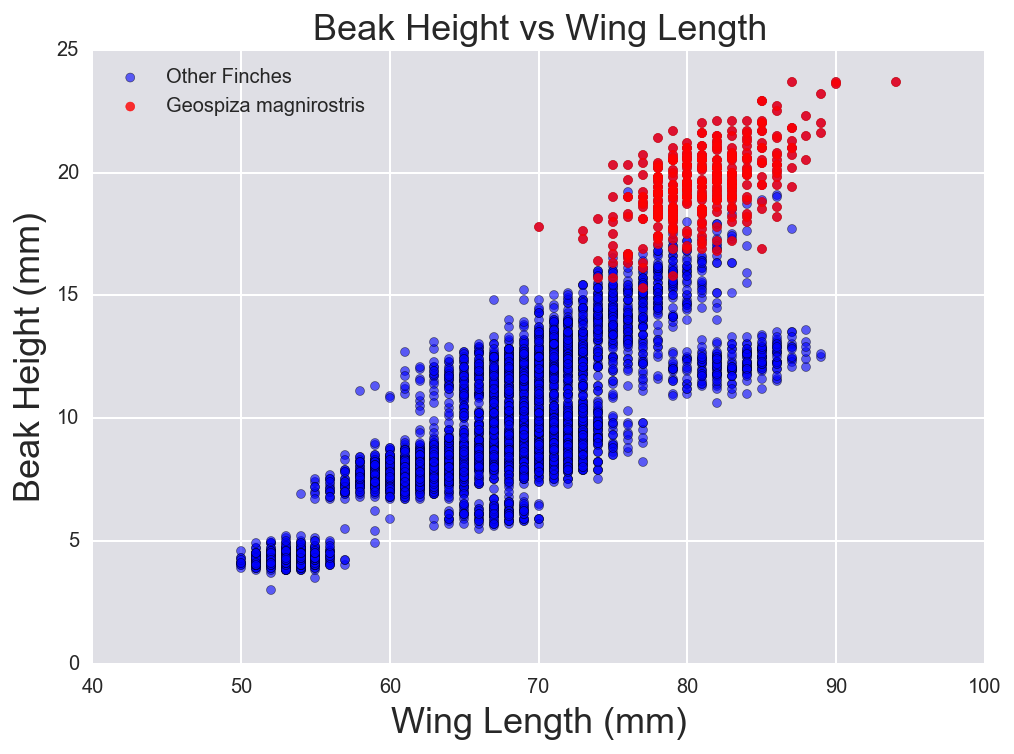

In [241]:
# Its hard to see how the plot above fits in with the original plot with all the birds
_ = plt.scatter(df_beakwing['WingL'],df_beakwing['BeakH'],alpha=0.6)
_ = plt.scatter(Gma_wings_beaks['WingL'],Gma_wings_beaks['BeakH'],alpha=.8,color ='red')

plt.xlabel('Wing Length (mm)')
plt.ylabel('Beak Height (mm)')
plt.title('Beak Height vs Wing Length')
plt.legend(['Other Finches','Geospiza magnirostris'],loc=2)